# Bộ dữ liệu lịch sử Việt Nam (vietnamese_history_dataset)

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load dataset

In [17]:
data_path = "..\datasets\\vietnamese_history_dataset\\data.json"
df = pd.read_json(path_or_buf=data_path)
df.head()

,title,content,type
0,BUỔI ĐẦU LỊCH SỬ NƯỚC TA,Chương: BUỔI ĐẦU LỊCH SỬ NƯỚC TA,chapter
1,THỜI NGUYÊN THUỶ TRÊN ĐẤT NƯỚC TA,Chương: BUỔI ĐẦU LỊCH SỬ NƯỚC TA\nBài: THỜI NG...,lesson
2,Những dấu tích của Người tối cổ được tìm thấy ...,Bài: THỜI NGUYÊN THUỶ TRÊN ĐẤT NƯỚC TA\nNhững ...,title
3,"Ở giai đoạn đầu, Người tinh khôn sống như thế ...",Bài: THỜI NGUYÊN THUỶ TRÊN ĐẤT NƯỚC TA\nỞ giai...,title
4,Giai đoạn phát triển của Người tinh khôn có gì...,Bài: THỜI NGUYÊN THUỶ TRÊN ĐẤT NƯỚC TA\nGiai đ...,title


## Thống kê số lượng mẫu mỗi loại

In [18]:
df.shape

(1121, 3)

In [ ]:
num_of_each_type = df.groupby("type").size()
num_of_each_type

type
chapter     67
lesson     199
title      855
dtype: int64

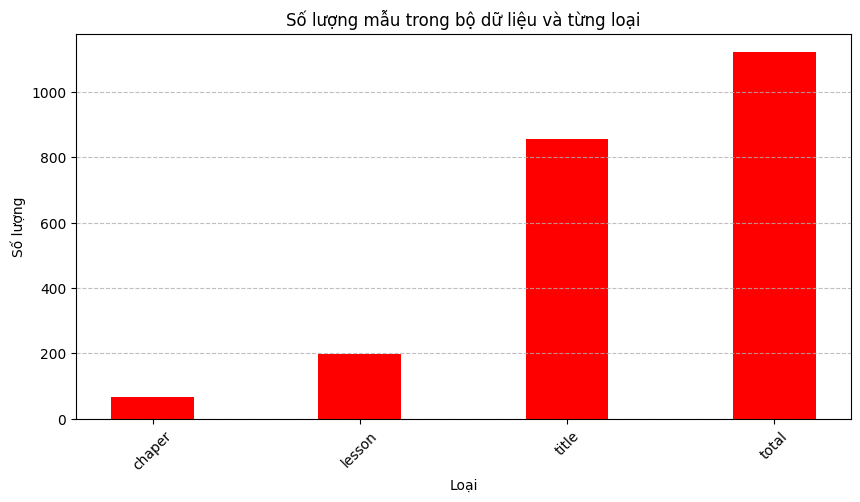

In [42]:
labels = ["chaper", "lesson", "title", "total"]

values = [x for x in num_of_each_type]
values.append(len(df))

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='red', width=0.4)
plt.title("Số lượng mẫu trong bộ dữ liệu và từng loại")
plt.xlabel("Loại")
plt.ylabel("Số lượng")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)
# plt.savefig("num_of_each_type.png")
plt.show()

## Biểu đồ Histogram phân bố độ dài nội theo theo loại

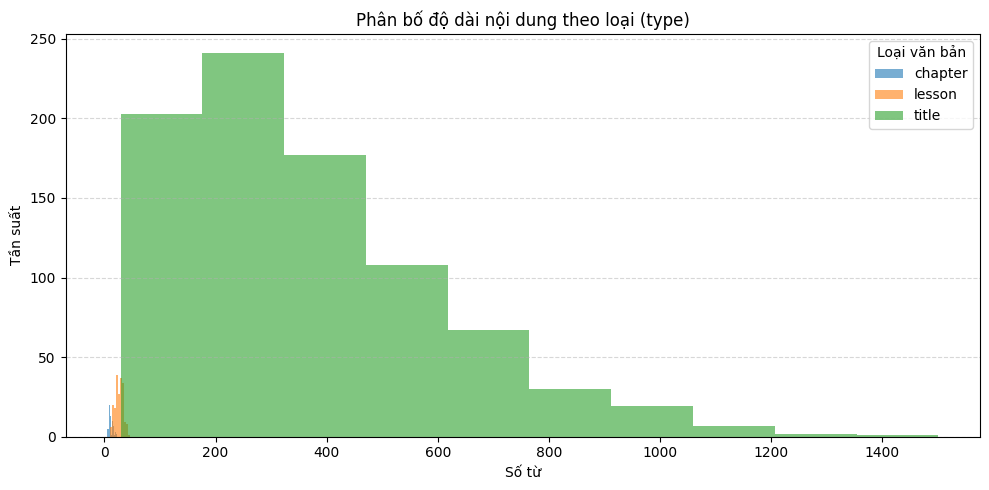

In [74]:
import matplotlib.pyplot as plt

# Tính độ dài nội dung
df["word_count"] = df["content"].apply(lambda x: len(x.split()))

# Vẽ histogram
plt.figure(figsize=(10, 5))

for t in df["type"].unique():
    subset = df[df["type"] == t]
    plt.hist(subset["word_count"], bins=10, alpha=0.6, label=t)

plt.title("Phân bố độ dài nội dung theo loại (type)")
plt.xlabel("Số từ")
plt.ylabel("Tần suất")
plt.legend(title="Loại văn bản")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Thống kê số lượng token cho mỗi dòng content

In [61]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2", cache_dir="..\\tokenizer_models\\")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [62]:
df["token_count"] = df["content"].apply(lambda x: len(tokenizer.encode(x)))

# Hiển thị 5 dòng đầu tiên để kiểm tra
print(df[["type", "content", "token_count"]].head())

Token indices sequence length is longer than the specified maximum sequence length for this model (1211 > 1024). Running this sequence through the model will result in indexing errors


      type                                            content  token_count
0  chapter                   Chương: BUỔI ĐẦU LỊCH SỬ NƯỚC TA           35
1   lesson  Chương: BUỔI ĐẦU LỊCH SỬ NƯỚC TA\nBài: THỜI NG...           74
2    title  Bài: THỜI NGUYÊN THUỶ TRÊN ĐẤT NƯỚC TA\nNhững ...          711
3    title  Bài: THỜI NGUYÊN THUỶ TRÊN ĐẤT NƯỚC TA\nỞ giai...          601
4    title  Bài: THỜI NGUYÊN THUỶ TRÊN ĐẤT NƯỚC TA\nGiai đ...          673


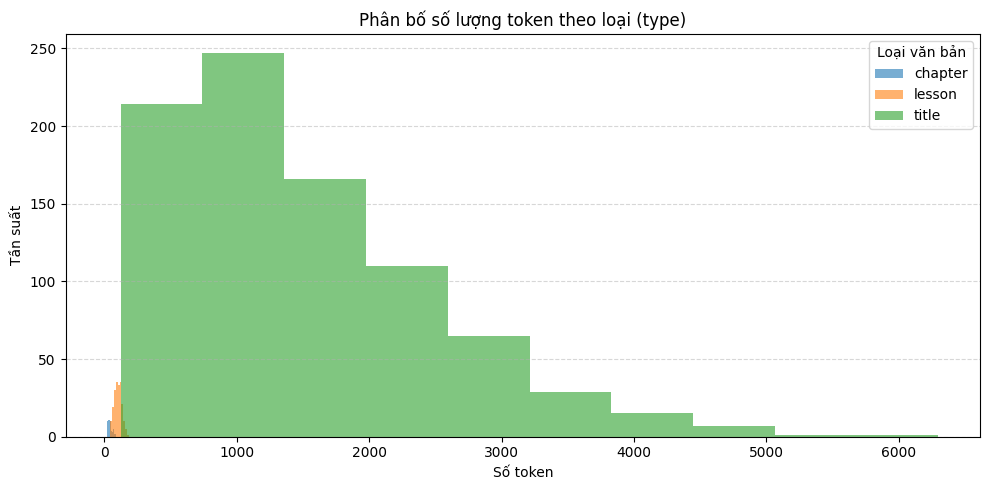

In [73]:
# Biểu đồ thống kê số lượng token
plt.figure(figsize=(10, 5))
for t in df["type"].unique():
    subset = df[df["type"] == t]
    plt.hist(subset["token_count"], bins=10, alpha=0.6, label=t)
plt.title("Phân bố số lượng token theo loại (type)")
plt.xlabel("Số token")
plt.ylabel("Tần suất")
plt.legend(title="Loại văn bản")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [63]:
# Thống kê cơ bản
print(df["token_count"].describe())

# Hoặc thống kê theo từng loại
print(df.groupby("type")["token_count"].describe())


count    1121.000000
mean     1146.967886
std      1042.210083
min        23.000000
25%       199.000000
50%       956.000000
75%      1726.000000
max      6298.000000
Name: token_count, dtype: float64
         count         mean         std    min    25%     50%     75%     max
type                                                                         
chapter   67.0    47.402985   16.896350   23.0   34.0    45.0    60.0    89.0
lesson   199.0   104.085427   28.579108   44.0   81.5   103.0   125.0   188.0
title    855.0  1475.861988  983.731836  125.0  741.5  1279.0  2036.0  6298.0


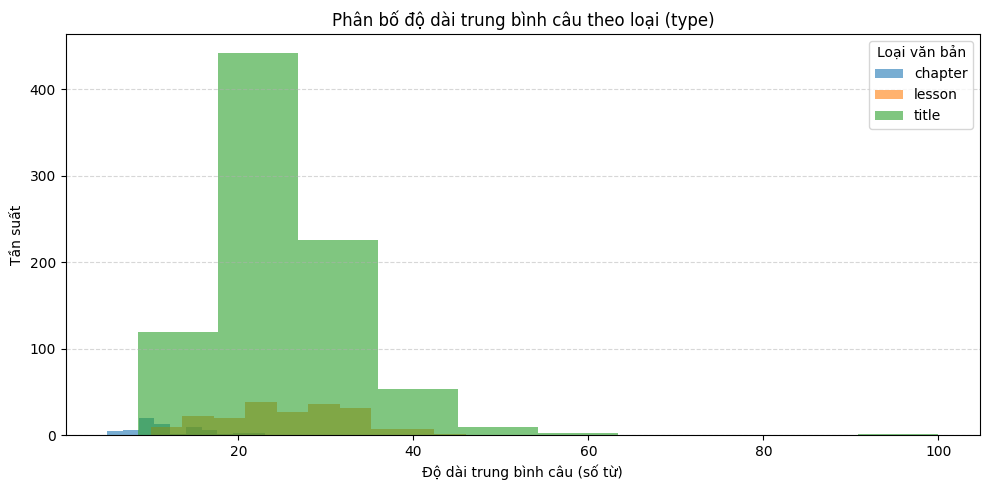

In [72]:
# Biểu đồ thống kê độ dài trung bình câu trong content
def avg_sentence_length(text):
    sentences = text.split('.')
    return sum(len(sentence.split()) for sentence in sentences) / len(sentences)
df["avg_sentence_length"] = df["content"].apply(avg_sentence_length)
# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
for t in df["type"].unique():
    subset = df[df["type"] == t]
    plt.hist(subset["avg_sentence_length"], bins=10, alpha=0.6, label=t)
plt.title("Phân bố độ dài trung bình câu theo loại (type)")
plt.xlabel("Độ dài trung bình câu (số từ)")
plt.ylabel("Tần suất")
plt.legend(title="Loại văn bản")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Sử dụng embedding và cluster để phân cụm data giống nhau